In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import files   # upload train.csv
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
from google.colab import files    # upload test.csv
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.head(10)
# thankfully there are only 12 columns, and all of them can be seen on a single page

In [0]:
test.head(10)
# note that the Survived column is missing

In [0]:
c1 = train.count()
print(c1)
c2 = train.shape[0]
c3 = train.shape[1]
print("train table ",c2,c3)

c2 = test.shape[0]
c3 = test.shape[1]
print("test table ",c2,c3)


**Data Dictionary**



* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Total rows and columns

* For train set there are 897 rows and 12 columns (include survival column)
* For test set there are 412 rows and 11 columns (no survival column)


In [0]:
train.info()
test.info()
# note the null entries in the 'Age' 'Cabin' 'Embarked' columns

In [0]:
# check how many null rows in train , test
print(train.isnull().sum())
print(test.isnull().sum())
# In train, there are 173 rows with missing Age, 685 rows with missing Cabin and 2 rows with missing Embarked information
# In test, there are 99 rows with missing Age, 329 rows with missing Cabin

# we need to deal with these missing data

In [0]:
# just reload the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
# doing some simple analysis of how various features are relevant to survival
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [0]:
# these seem relevant
#bar_chart('Sex')
#bar_chart('Pclass')
#bar_chart('Embarked')

# these seem not relevant
#bar_chart('Cabin')

In [0]:
# fill missing age with median age for everybody
train["Age"].fillna(train['Age'].median(), inplace=True)
test["Age"].fillna(test['Age'].median(), inplace=True)

# but note that it can be better filled according to the title (Mr, Mrs, Miss, Others) in the Name
# but we leave it till next time
#train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
#test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [0]:
# examine age bands
print(np.min(train['Age']),'--',np.median(train['Age']),'--',np.max(train['Age']))
train['agebin']=pd.cut(train['Age'],5)
train['agebin'].value_counts().sort_index()
#train['agebin'].value_counts()

0.3333 -- 28.0 -- 76.0


(0.258, 15.467]      79
(15.467, 30.6]      509
(30.6, 45.733]      196
(45.733, 60.867]     87
(60.867, 76.0]       26
Name: agebin, dtype: int64

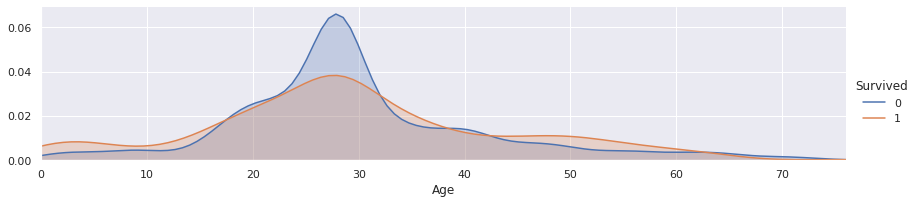

In [0]:
import numpy as np
# Analyzing Age distribution of survival & dead
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show() 

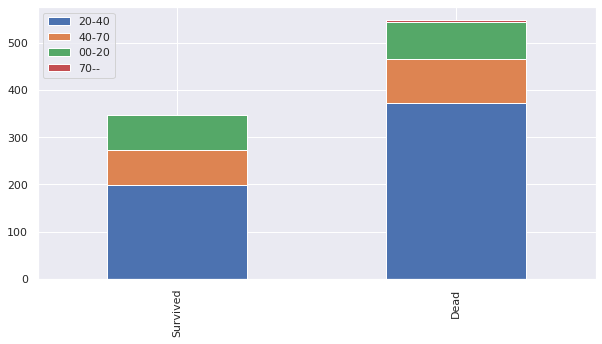

In [0]:
# Analyzing Age , needs to be binned appropriately
#data = pd.concat([train, test])
#mmax = np.max(data['Age'])
#mmin = np.min(data['Age'])

# add a new column with age bins
def ageBinning(x):
    if x<20: return '00-20'
    if x<40: return '20-40'
    if x<70: return '40-70'
    return '70--'
train['agebin'] = train['Age'].apply(ageBinning)
train[['Survived','Age','agebin']]
bar_chart('agebin')

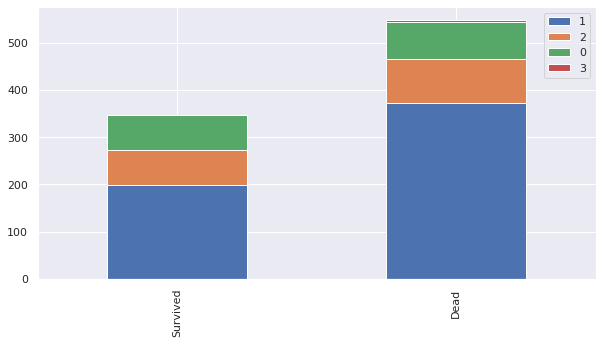

In [0]:
# make the age bin numeric 
def ageBinning(x):
    if x<20: return 0
    if x<40: return 1
    if x<70: return 2
    return 3
train['agebin'] = train['Age'].apply(ageBinning)
train[['Survived','Age','agebin']]
bar_chart('agebin')

In [0]:
train.drop('Age', axis=1, inplace=True)

In [0]:
# analyzing the Name, find most frequent descriptive terms
#nn = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#print(train['Name'])
#print(nn.value_counts().head(7))

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# ticket seem unncessary for classification...drop it from dataset
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [0]:
# fill missing Fare data with the median fare according to the Pclass of the Fare
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

# examine fare bands using cut and qcut
print(np.min(train['Fare']),'--',np.median(train['Fare']),'--',np.max(train['Fare']))
train['farebin']=pd.qcut(train['Fare'],10)
train['farebin'].value_counts().sort_index()
#train['agebin'].value_counts()

0.0 -- 15.05 -- 512.3292


(-0.001, 7.733]       91
(7.733, 7.896]       120
(7.896, 8.05]         65
(8.05, 11.5]          84
(11.5, 15.05]         89
(15.05, 23.0]         92
(23.0, 27.75]         88
(27.75, 41.579]       89
(41.579, 77.958]      90
(77.958, 512.329]     89
Name: farebin, dtype: int64

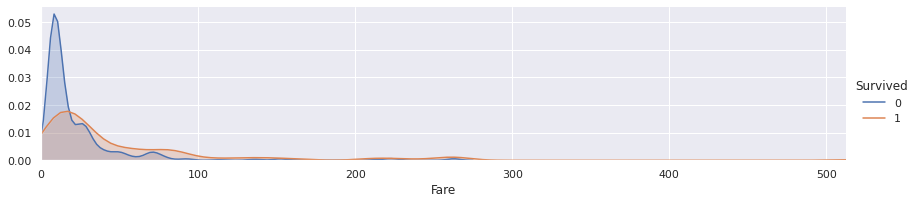

(0.0, 50.0)

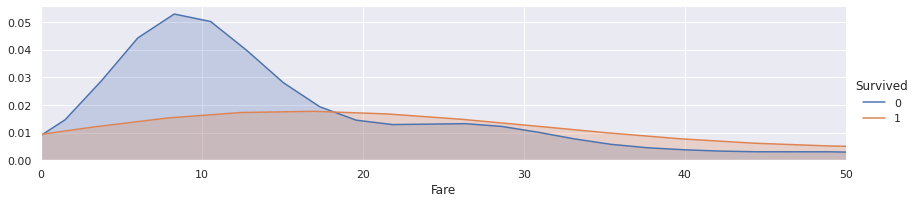

In [0]:
# Analyze the Fare column
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()  

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 50)

# fill missing Fare with median fare for each Pclass
#train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
#test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
#train.head(50)


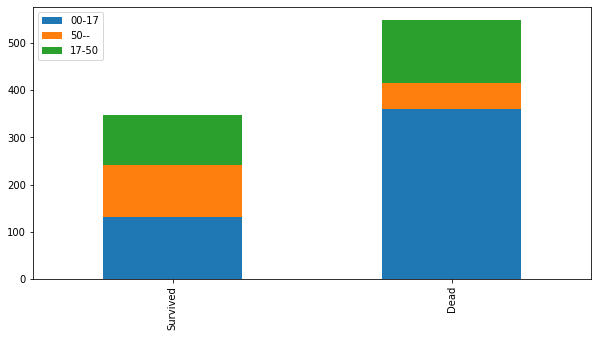

In [0]:
# add a new column with Fare bins
def FareBinning(x):
    if x<17: return '00-17'
    if x<50: return '17-50'
    return '50--'
train['farebin'] = train['Fare'].apply(FareBinning)
train[['Survived','Fare','farebin']]
bar_chart('farebin')

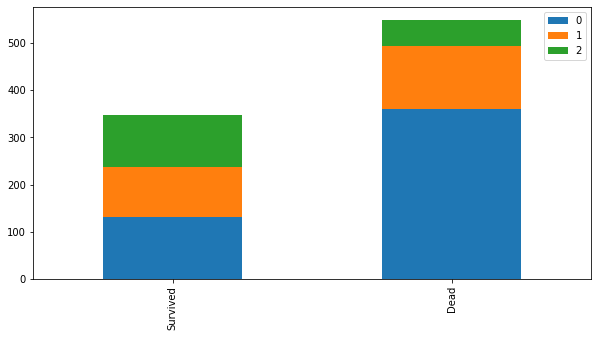

In [0]:
# make the farebin numeric
def FareBinning(x):
    if x<17: return 0
    if x<50: return 1
    return 2
train['farebin'] = train['Fare'].apply(FareBinning)
train[['Survived','Fare','farebin']]
bar_chart('farebin')

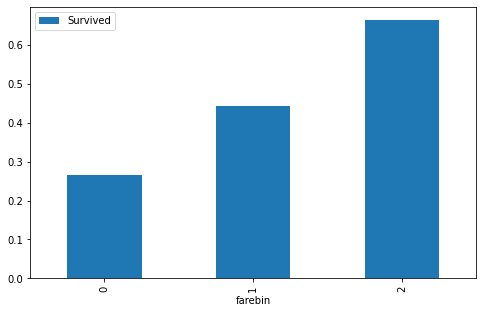

In [0]:
train[['farebin','Survived']].groupby(['farebin']).mean().plot.bar(figsize=(8,5))

In [0]:
train.drop('Fare', axis=1, inplace=True)

(0.0, 11.0)

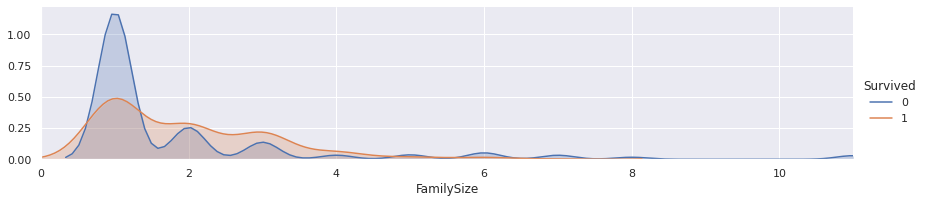

In [0]:
# Family Size
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [0]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train['FamilySize'] = train['FamilySize'].map(family_mapping)

In [0]:
train.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)

# **Pivot Table**

consider using pivot table to further discover feature relationships

https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html


DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')

In [0]:
train.pivot_table('Survived', index='Sex', columns='Pclass')

                     Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       37.485437  116.808090  0.504854  0.543689  0.980583
       2       29.006849   23.741496  0.712329  0.575342  0.904110
       3       24.954839   15.652367  0.774194  0.774194  0.477419
male   1       38.410619   65.362433  0.330645  0.338710  0.354839
       2       30.502825   19.577224  0.203390  0.313559  0.169492
       3       26.358796   12.875203  0.262346  0.521605  0.132716


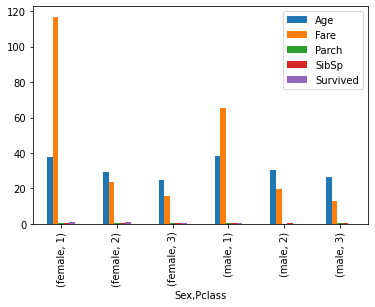

In [0]:
# compare 'Sex' with other attributes
pivotTable = pd.pivot_table(train, values=['Age','Fare','Parch','SibSp','Survived'], index=['Sex','Pclass'])
#pivotTable = pd.pivot_table(train, values=['Age','Survived'], index=['Sex','Pclass'], aggfunc={'Age':np.mean,'Survived':np.sum})
print(pivotTable)
pivotTable.plot(kind='bar');

In [0]:
# check the correlation between attribute pairs
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,farebin
Survived,1.000000,-0.341922,-0.015155,-0.043591,0.083555,0.260102,0.311390
Pclass,-0.341922,1.000000,-0.376833,0.072951,0.010190,-0.560697,-0.718149
Age,-0.015155,-0.376833,1.000000,-0.154252,-0.086409,0.196611,0.214363
SibSp,-0.043591,0.072951,-0.154252,1.000000,0.355769,0.176051,0.326708
Parch,0.083555,0.010190,-0.086409,0.355769,1.000000,0.250309,0.314047
Fare,0.260102,-0.560697,0.196611,0.176051,0.250309,1.000000,0.700291
farebin,0.311390,-0.718149,0.214363,0.326708,0.314047,0.700291,1.000000


In [0]:
# PassengerId is unncessary for classification...drop it from train, but keep for test as identifier for Kaggle scoring
train.drop('PassengerId', axis=1, inplace=True)

testPassengerId = test['PassengerId']           # save this column for submission to Kaggle scoring
test.drop('PassengerId', axis=1, inplace=True)

In [0]:
train

In [0]:
print(train.shape)
print(test.shape)

(897, 8)
(412, 8)


In [0]:
# change Sex variable from male/female to a numerical value 0/1
train['Sex'] = train['Sex'].map({"male": 0, "female": 1})
test['Sex'] = test['Sex'].map({"male": 0, "female": 1})

# change Embarked variable from S/C/Q to a numerical value 0/1/2
train['Embarked'] = train['Embarked'].map({"S": 0, "C": 1, "Q": 2})
test['Embarked']  = test['Embarked'].map({"S": 0, "C": 1, "Q": 2})

# Cabin seems relevant to classification, but it is unclear how to convert to a suitable numerical value
# we just drop it for the time moment
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [0]:
# fill missing Embarked with 0 since it is the majority
train['Embarked'].value_counts()
train['Embarked'] = train['Embarked'].fillna(0)

In [0]:
# check that there is now no more missing Fare, Age, Embarked
print(train.isnull().sum())
print(test.isnull().sum())

In [0]:
train.head(10)
#test.head(10)

In [0]:
# we also need to drop the Survived for the train set
# before we drop, we save the Survived column as train_labels
train_labels = train['Survived']
train.drop('Survived', axis=1, inplace=True)

In [0]:
print(train.shape)
print(test.shape)
print(train_labels.shape)
# confirm we have consistent train dimension: 897 x 7 , and test 412 x 7,  and train_labels  897 x 1

(897, 6)
(412, 7)
(897,)


**Classifier Modules**

In [0]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [0]:
train.info()
train.isnull().any()

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [0]:
# Try KNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)
# 68% not bad for a first try!
# 80% after adjusting for smaller range of numeric fares, age

[0.78888889 0.86666667 0.8        0.81111111 0.83333333 0.74444444
 0.73333333 0.79775281 0.80898876 0.80898876]


79.94

In [0]:
# decision tree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)
# 76% for first try!
# 79% after adjusting for smaller range of numeric fares, age

[0.82222222 0.85555556 0.84444444 0.8        0.82222222 0.73333333
 0.75555556 0.75280899 0.76404494 0.73033708]


78.81

In [0]:
# Random Forest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)
# 79% for first try!
# 80% after adjusting for smaller range of numeric fares, age

[0.78888889 0.84444444 0.87777778 0.8        0.81111111 0.73333333
 0.76666667 0.78651685 0.74157303 0.75280899]


79.03

In [0]:
# Naive Bayes
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)
# 78% for first try
# 78% after adjusting for smaller range of numeric fares, age

[0.74444444 0.86666667 0.78888889 0.75555556 0.84444444 0.68888889
 0.73333333 0.82022472 0.66292135 0.85393258]


77.59

In [0]:
# SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)
# 67% for first try
# 81% after adjusting for smaller range of numeric fares, age

[0.8        0.87777778 0.82222222 0.81111111 0.85555556 0.73333333
 0.75555556 0.87640449 0.74157303 0.82022472]


80.94

In [0]:
# Test submission to Kaggle
# use Random Forest, we achieve 78% first try
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train, train_labels)
prediction = clf.predict(test)
submission = pd.DataFrame({
        "PassengerId": testPassengerId,
        "Survived": prediction
    })

In [0]:
# 2nd test submission to Kaggle
# use SVC, we achieve ???
clf = SVC()
clf.fit(train, train_labels)
prediction = clf.predict(test)
submission = pd.DataFrame({
        "PassengerId": testPassengerId,
        "Survived": prediction
    })

In [0]:

submission.to_csv('submission.csv', index=False)
#submission = pd.read_csv('submission.csv')
#submission.head()


**Official Kaggle Titanic**

Some Kaggle Titanic code below

In [0]:
# Below are from official Kaggle Titanic
#
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
p_id = test['PassengerId']
data = pd.concat([train, test])

print('train',train.shape)
print('test',test.shape)
print('data',data.shape)

In [0]:
data.drop('PassengerId', axis=1, inplace=True)
survived = data['Survived'].dropna()
data['Survived'].fillna(-1, inplace=True)

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def one_hot(dataframe, name):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[name])
                           .rename(columns=lambda x: name + str(x))], axis=1)
    return dataframe.drop(name, axis=1)


def preprocess_data(data):
    data['Cabin'].fillna('U0', inplace=True)
    data['CabinSection'] = LabelEncoder().fit_transform(data['Cabin'].map(lambda x: x[0]))
    
    data['CabinDistance'] = data['Cabin'].map(lambda x: x[1:])
    data['CabinDistance'] = data['CabinDistance'].map(lambda x: x.split(' ')[0])
    data['CabinDistance'].where(data['CabinDistance'] != '', '0', inplace=True)
    data['CabinDistance'] = data['CabinDistance'].map(lambda x: int(x))
    data['CabinDistance'] = StandardScaler().fit_transform(data['CabinDistance'].values.reshape(-1, 1))

    data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

    data['Embarked'].fillna('S', inplace=True)
    data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])
    
    data['Name'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0])
    data['Name'] = LabelEncoder().fit_transform(data['Name'])
    
    data['Fare'].fillna(-1, inplace=True)
    medians = dict()
    for pclass in data['Pclass'].unique():
        median = data.Fare[(data["Fare"] != -1) & (data['Pclass'] == pclass)].median()
        medians[pclass] = median
    for index, row in data.iterrows():
        if row['Fare'] == -1:
            data.loc[index, 'Fare'] = medians[row['Pclass']]
    data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))
    #data.drop('Fare', axis=1, inplace=True)
    
    data['Age'].fillna(-1, inplace=True)
    medians = dict()
    for title in data['Name'].unique():
        median = data.Age[(data["Age"] != -1) & (data['Name'] == title)].median()
        medians[title] = median
    for index, row in data.iterrows():
        if row['Age'] == -1:
            data.loc[index, 'Age'] = medians[row['Name']]
            
    data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))
    
    for index, row in data.iterrows():
        ticket = row['Ticket']
        sibsp = row['SibSp']
        parch = row['Parch']

        if sibsp > 0 or parch > 0:
            ages = list()
            for index2, row2 in data[data['Ticket'] == ticket].iterrows():
                ages.append(row2['Age'])
            data.loc[index, 'Age2'] = min(ages)

        else:
            data.loc[index, 'Age2'] = row['Age']
            
    data['Age2'] = StandardScaler().fit_transform(data['Age2'].values.reshape(-1, 1))
    
    died_titles = ('Don', 'Rev', 'Capt', 'Jonkheer')
    survived_titles = ('Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'the Countess')
    data['Title_Died'] = data['Name'].apply(lambda x: int(x in died_titles))
    data['Title_Survived'] = data['Name'].apply(lambda x: int(x in survived_titles))

    for title in ('Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Major', 'Col'):
        data['Title_{}'.format(title)] = data['Name'].apply(lambda x: int(x == title))

    data.drop('Name', axis=1, inplace=True)
    
    data = one_hot(data, 'Pclass')
    #data = one_hot(data, 'Embarked')
    
    data.drop('Cabin', axis=1, inplace=True)
    data.drop('Ticket', axis=1, inplace=True)
    
    return data

In [0]:
#import titanic_predict as tp   # see https://github.com/aisaturday/kaggle-titanic-ai-code for more details
#processed_data = tp.preprocess_data(data)

processed_data = preprocess_data(data)

In [0]:
#print(processed_data.count())
print(processed_data.isnull().sum())
print('processed_data',processed_data.shape)

In [0]:

training_data = processed_data[data['Survived'] != -1]
testing_data = processed_data[data['Survived'] == -1]

training_data.drop('Survived', axis=1, inplace=True)
testing_data.drop('Survived', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(training_data, survived, test_size=0.20, random_state=42)

In [0]:
# check how many null rows in train , test
print(training_data.isnull().sum())
print(testing_data.isnull().sum())

print('training_data',training_data.shape)
print('testing_data ',testing_data.shape)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
models = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

modelname = ['KNeighborsClassifier',
             'SVC-linear',
             'SVC-gamma',
             'DecisionTreeClassifier',
             'RandomForestClassifier',
             'MLPClassifier',
             'AdaBoostClassifier',
             'GaussianNB',
             'QuadraticDiscriminantAnalysis']

i = 0
scores ={} # dictionary of model with associated accuracy score
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores[model] = score
    print(modelname[i],score)
    i = i+1
    
model_with_max_score = max(scores, key=lambda k: scores[k])   
print(f"{model_with_max_score} has maximum score of {scores[model_with_max_score]}")    


KNeighborsClassifier 0.7277777777777777
SVC-linear 0.75
SVC-gamma 0.7388888888888889
DecisionTreeClassifier 0.7555555555555555
RandomForestClassifier 0.7555555555555555
MLPClassifier 0.7777777777777778
AdaBoostClassifier 0.7777777777777778
GaussianNB 0.75
QuadraticDiscriminantAnalysis 0.6055555555555555
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) has maximum score of 0.7777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
